In [1]:
import torch
import numpy as np
import scipy.io as sio
import os
import time
from scipy import stats
from EnsemblePursuit import EnsemblePursuitPyTorch

In [2]:
def STA(stimulus,response):
    stimulus=torch.cuda.FloatTensor(stimulus)
    response=torch.cuda.FloatTensor(response)
    receptive_field1=torch.inverse(torch.matmul(stimulus.t(),stimulus))
    receptive_field2=torch.matmul(stimulus.t(),response.view(response.size()[0],1))
    receptive_field=torch.matmul(receptive_field1,receptive_field2)
    print(receptive_field.size())
    return receptive_field

def reg_STA(stimulus,response,lambd=1000):
    stimulus=torch.cuda.FloatTensor(stimulus)
    response=torch.cuda.FloatTensor(response)
    receptive_field1=torch.inverse(torch.matmul(stimulus.t(),stimulus)+lambd*torch.eye(stimulus.size()[1]).cuda())
    receptive_field2=torch.matmul(stimulus.t(),response.view(response.size()[0],1))
    receptive_field=torch.matmul(receptive_field1,receptive_field2)
    print(receptive_field.size())
    return receptive_field
                                  
                                  
    

In [38]:
X=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/natimg2800_M170717_MP034_2017-09-11.mat')['stim']['resp'][0][0]
X[X<0]=0
images=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/images_natimg2800_all.mat')['imgs']
print(images.shape)
images=images.transpose((2,0,1))
print(images.shape)
images=images.reshape((2800,68*270))

print(images.shape)
#stim=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/natimg2800_M170717_MP034_2017-09-11.mat')['stim']['istim'][0][0]

(68, 270, 2800)
(2800, 68, 270)
(2800, 18360)


In [4]:
print(images)
#print(images.T@images)

[[129 127 125 ... 113 121 123]
 [132 133 133 ... 126 128 130]
 [132 165 187 ... 126 125 125]
 ...
 [129 132 135 ... 107 124 116]
 [127 116 102 ... 100 114 126]
 [126 113 104 ... 131 132 132]]


In [5]:
neuron_init_dict={'method':'top_k_corr','parameters':{'T':10,'n_of_neurons':100,'min_assembly_size':8}}
ep=EnsemblePursuitPyTorch()
U_V,nr_of_neurons,U,V, cost_lst,seed_neurons=ep.fit_transform(X,0.05,100,neuron_init_dict)

sz torch.Size([5880, 10103])
top n 1608 0.5516875386238098
ensemble nr 0
cost tensor(0.9857, device='cuda:0')
top n 3183 0.6139754056930542
ensemble nr 1
cost tensor(0.9786, device='cuda:0')
top n 6415 0.533966064453125
ensemble nr 2
cost tensor(0.9746, device='cuda:0')
top n 3100 0.58597731590271
ensemble nr 3
cost tensor(0.9719, device='cuda:0')
top n 1076 0.5770801901817322
ensemble nr 4
cost tensor(0.9685, device='cuda:0')
top n 2545 0.5335924625396729
ensemble nr 5
cost tensor(0.9654, device='cuda:0')
top n 2657 0.579582691192627
top n 2854 0.5654461979866028
ensemble nr 6
cost tensor(0.9628, device='cuda:0')
top n 984 0.5813974738121033
ensemble nr 7
cost tensor(0.9609, device='cuda:0')
top n 3057 0.5366870760917664
ensemble nr 8
cost tensor(0.9579, device='cuda:0')
top n 4978 0.5288177132606506
ensemble nr 9
cost tensor(0.9561, device='cuda:0')
top n 2619 0.5164979100227356
top n 3643 0.5059649348258972
top n 9414 0.509863555431366
top n 5168 0.529632031917572
ensemble nr 10
cos

cost tensor(0.9032, device='cuda:0')
top n 2703 0.48767325282096863
top n 3057 0.4640381336212158
top n 6932 0.4621756672859192
ensemble nr 54
cost tensor(0.9021, device='cuda:0')
top n 3866 0.6593899130821228
top n 123 0.4569413363933563
top n 2687 0.48391610383987427
top n 1830 0.475118488073349
top n 2406 0.45820656418800354
top n 1842 0.49999555945396423
top n 1830 0.475118488073349
top n 7439 0.49369850754737854
top n 386 0.46663257479667664
top n 2030 0.46553561091423035
top n 1290 0.5185002088546753
top n 4562 0.49338921904563904
top n 1568 0.4821859300136566
top n 2601 0.5128015279769897
top n 3643 0.5038761496543884
top n 1283 0.4644008278846741
top n 984 0.5117988586425781
top n 221 0.4643592834472656
top n 4821 0.4824136793613434
top n 8101 0.5119056105613708
top n 386 0.46663257479667664
top n 3232 0.47668886184692383
top n 3954 0.5135230422019958
top n 2687 0.48391610383987427
top n 149 0.49399515986442566
top n 3121 0.4558955132961273
ensemble nr 55
cost tensor(0.9011, de

top n 352 0.43593311309814453
top n 5241 0.4090340733528137
top n 196 0.47775110602378845
top n 5030 0.41168877482414246
top n 9576 0.43189889192581177
top n 2188 0.46730348467826843
top n 6558 0.42354169487953186
top n 2650 0.521767795085907
top n 1035 0.4389757215976715
top n 1988 0.4504142701625824
top n 2651 0.4516483247280121
top n 7322 0.4169580042362213
ensemble nr 61
cost tensor(0.8960, device='cuda:0')
top n 5154 0.4709596335887909
top n 1672 0.4306182861328125
top n 3665 0.4048037528991699
ensemble nr 62
cost tensor(0.8953, device='cuda:0')
top n 4990 0.45501708984375
top n 3028 0.42549529671669006
top n 7003 0.4261344373226166
top n 2205 0.48788079619407654
top n 1442 0.4091322124004364
ensemble nr 63
cost tensor(0.8947, device='cuda:0')
top n 9970 0.4395628571510315
ensemble nr 64
cost tensor(0.8939, device='cuda:0')
top n 6742 0.4225175082683563
top n 5904 0.41659241914749146
ensemble nr 65
cost tensor(0.8932, device='cuda:0')
top n 3998 0.410554975271225
ensemble nr 66
co

top n 8028 0.4455108642578125
top n 4854 0.6307509541511536
top n 3237 0.3951142132282257
top n 7037 0.4003661572933197
top n 1809 0.39694902300834656
top n 2504 0.43173590302467346
top n 9147 0.43085652589797974
top n 1967 0.41009321808815
top n 5404 0.41989627480506897
top n 2479 0.4018211364746094
top n 1013 0.4063023030757904
top n 8944 0.40601396560668945
top n 8853 0.40674033761024475
top n 2833 0.4093763828277588
top n 3571 0.4904288947582245
top n 2907 0.5072556138038635
top n 1031 0.40854620933532715
top n 2328 0.4485839307308197
top n 2144 0.4342212378978729
top n 6161 0.40174150466918945
top n 3004 0.41480857133865356
top n 2144 0.4342212378978729
top n 648 0.4163142144680023
top n 699 0.5164030194282532
top n 742 0.3975934684276581
top n 3521 0.396388441324234
top n 2546 0.4176672101020813
top n 3813 0.395155668258667
top n 9296 0.40821585059165955
top n 8920 0.4041464924812317
top n 2093 0.41878482699394226
top n 149 0.4792105257511139
top n 1452 0.40119242668151855
top n 

top n 3866 0.6467955112457275
top n 1763 0.49246254563331604
top n 1290 0.5147244334220886
top n 341 0.503736674785614
top n 2115 0.44236811995506287
top n 2774 0.6353499293327332
top n 8853 0.40573978424072266
ensemble nr 95
cost tensor(0.8726, device='cuda:0')
top n 1129 0.4055176377296448
top n 3280 0.4197065532207489
top n 7369 0.4060388505458832
top n 1013 0.40689951181411743
top n 6422 0.47230467200279236
top n 2716 0.49717235565185547
top n 304 0.39587125182151794
top n 3954 0.5088362097740173
top n 1481 0.4615996479988098
top n 9608 0.39810463786125183
top n 7310 0.4019692838191986
top n 2650 0.5214962959289551
top n 9353 0.43338248133659363
top n 6422 0.47230467200279236
top n 1076 0.4646783471107483
top n 3612 0.44218212366104126
top n 4194 0.413920134305954
top n 2349 0.39541977643966675
top n 899 0.39362239837646484
top n 3962 0.4437997043132782
top n 4863 0.4908246695995331
top n 5471 0.39314910769462585
top n 7099 0.41985589265823364
top n 2069 0.4926159083843231
top n 26

ensemble nr 99
cost tensor(0.8703, device='cuda:0')
torch.Size([5880, 10103])
torch.Size([10103, 100])
torch.Size([100, 5880])


In [6]:
print(np.array(V).shape)

def test_train_split(data,stim):
    unique, counts = np.unique(stim.flatten(), return_counts=True)
    count_dict=dict(zip(unique, counts))

    keys_with_enough_data=[]
    for key in count_dict.keys():
        if count_dict[key]==2:
            keys_with_enough_data.append(key)

    filtered_stims=np.isin(stim.flatten(),keys_with_enough_data)

    #Arrange data so that responses with the same stimulus are adjacent
    z=stim.flatten()[np.where(filtered_stims)[0]]
    sortd=np.argsort(z)
    istim=np.sort(z)
    X=data[filtered_stims,:]
    out=X[sortd,:].copy()

    x_train=out[::2,:]
    y_train=istim[::2]
    x_test=out[1::2,:]
    y_test=istim[1::2]
    
    return x_train, x_test, y_train, y_test

stim=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/natimg2800_M170717_MP034_2017-09-11.mat')['stim']['istim'][0][0]
x_train, x_test, y_train, y_test=test_train_split(np.array(V.t()),stim)
print(x_train.shape)
#receptive_field=STA(stimulus,V)

(100, 5880)
(2800, 100)


In [7]:
receptive_field=STA(images,x_train[:,1].T)

torch.Size([18360, 1])


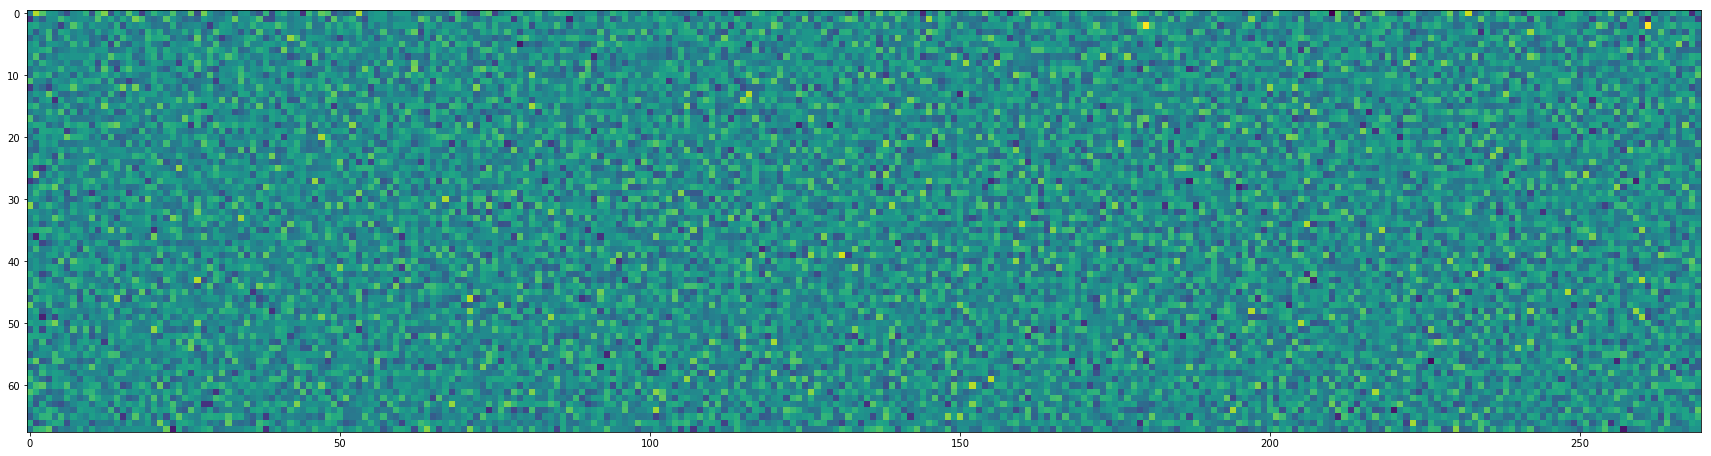

In [8]:
r=np.array(receptive_field.cpu()).reshape(68,270)


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30, 30]
plt.imshow(r)

torch.Size([18360, 1])


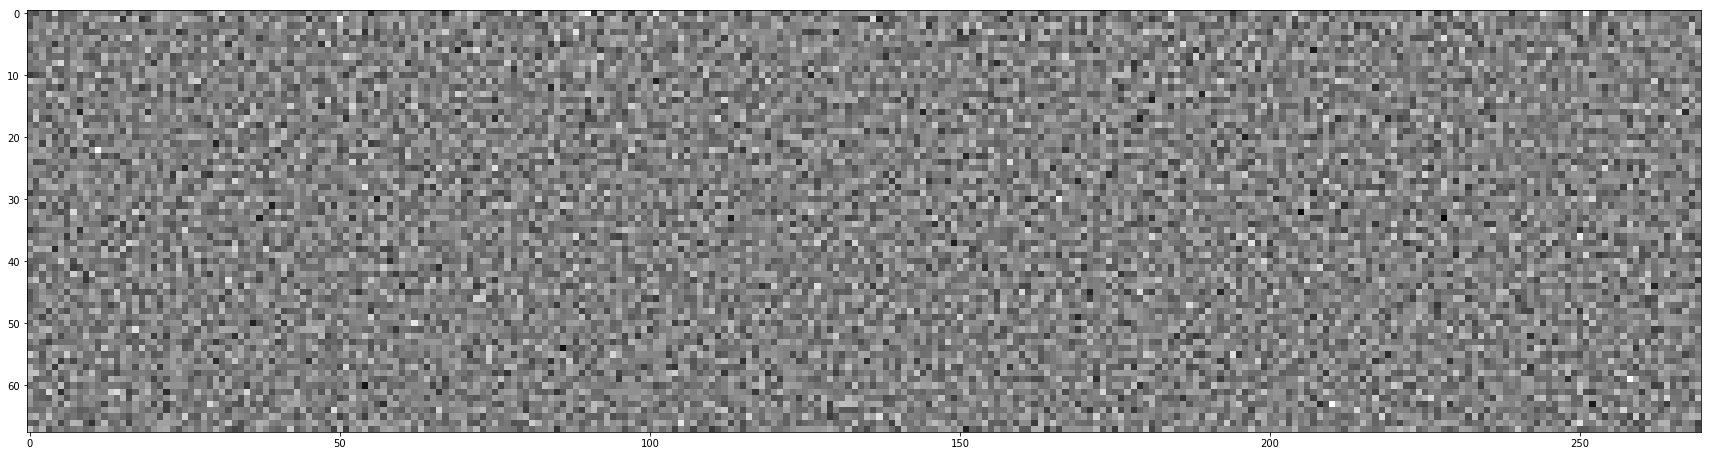

In [9]:
rec_f=reg_STA(images,x_train[:,78].T)
r=np.array(rec_f.cpu()).reshape(68,270)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30, 30]
plt.imshow(r,cmap='gray')

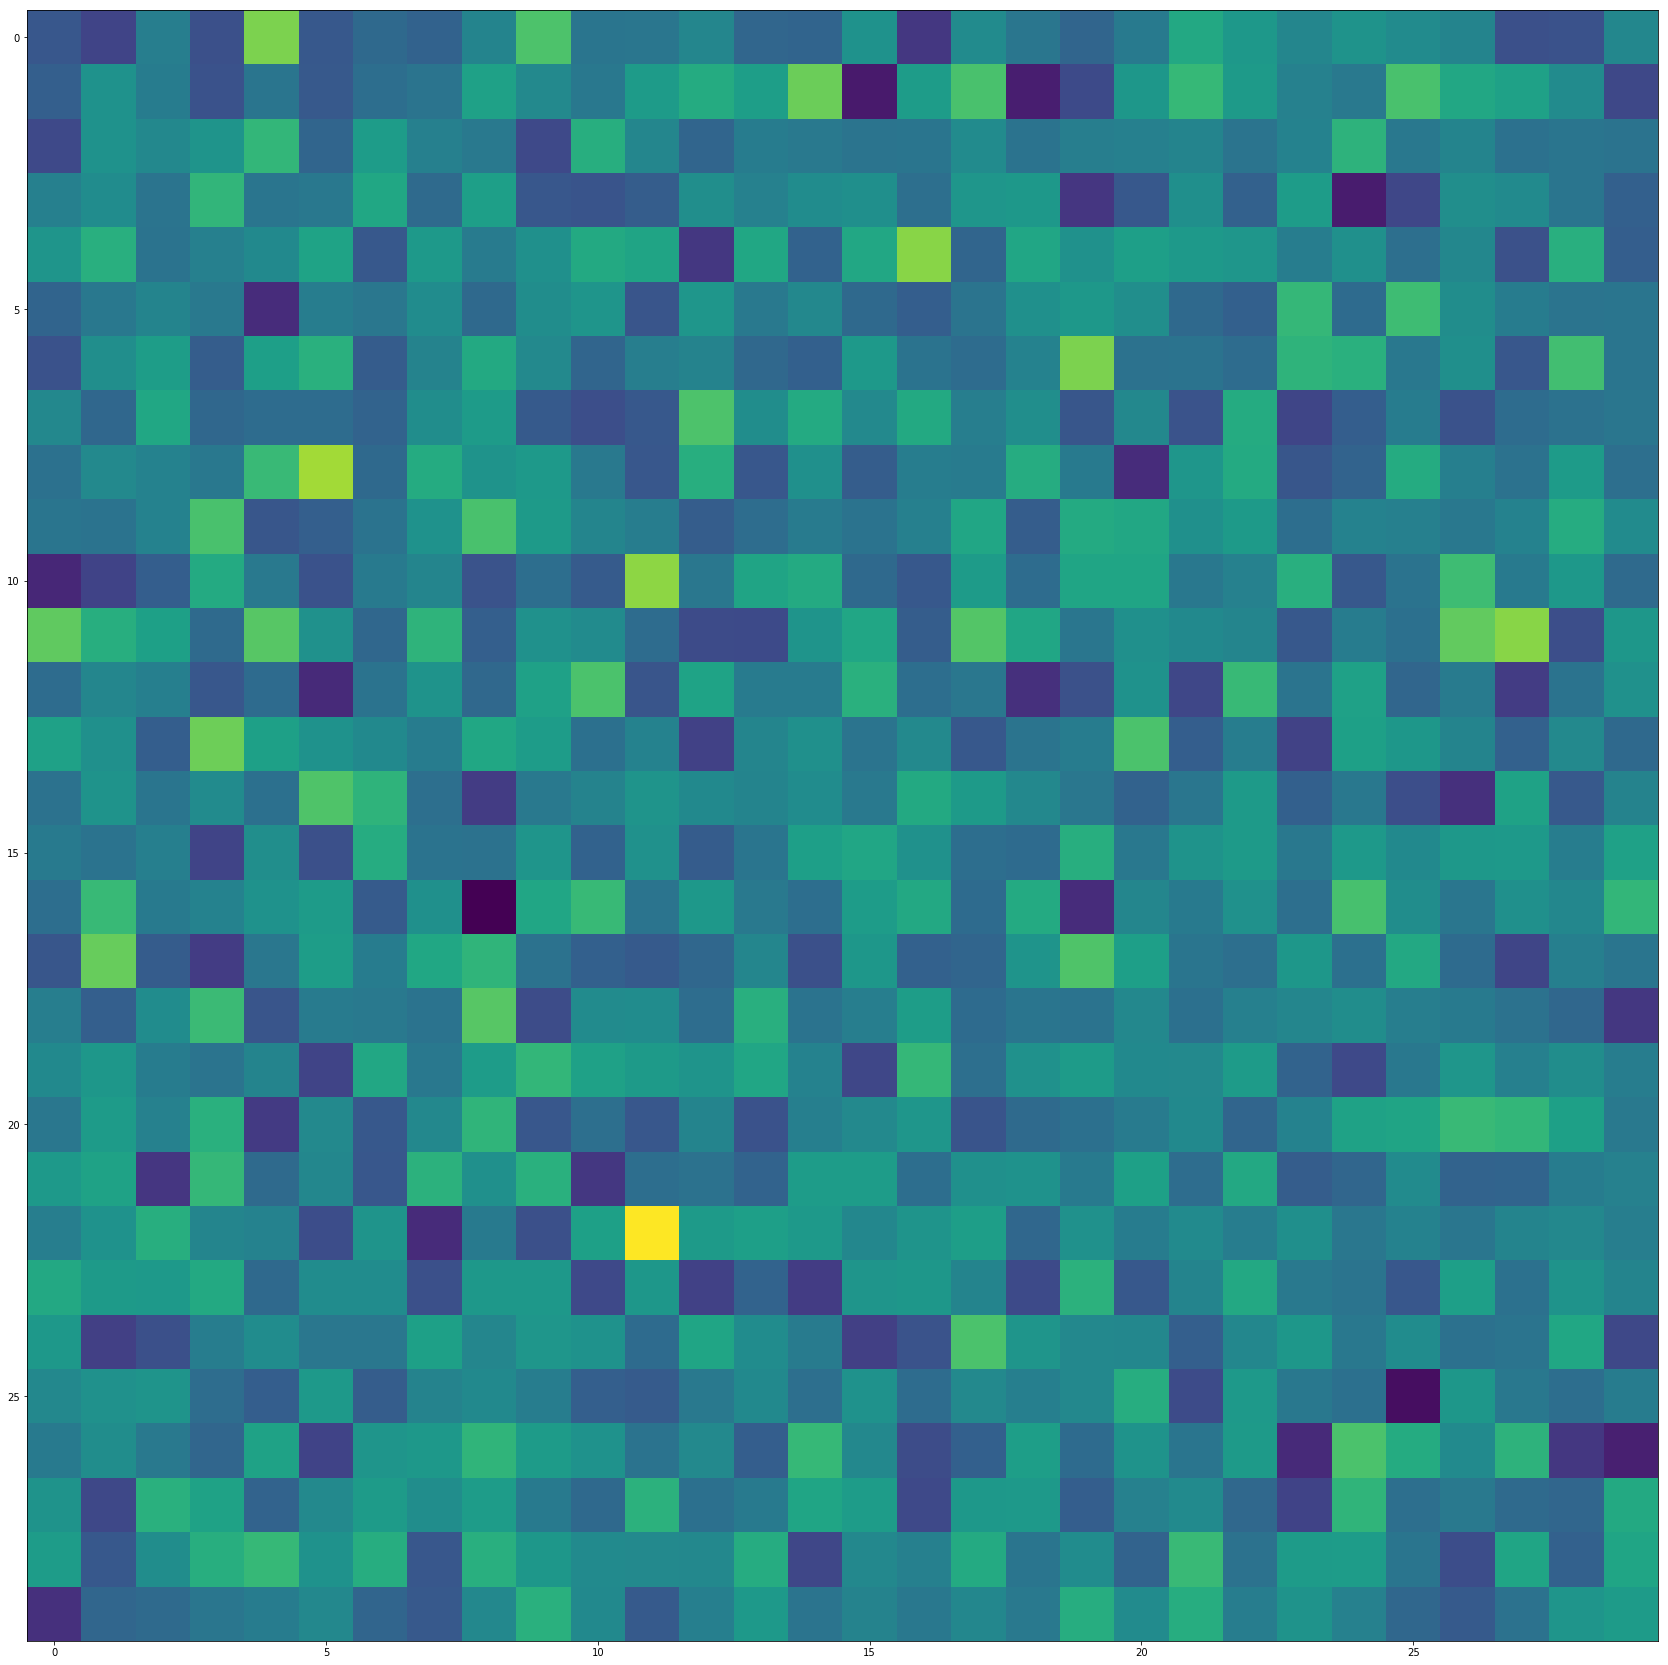

In [10]:
plt.imshow(r[:30,:30])

In [17]:
from sklearn.linear_model import OrthogonalMatchingPursuit
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=1000)
omp.fit(images, x_train[:,0])
coef = omp.coef_

[ 0.         0.         0.        ...  0.         0.        -0.0002658]


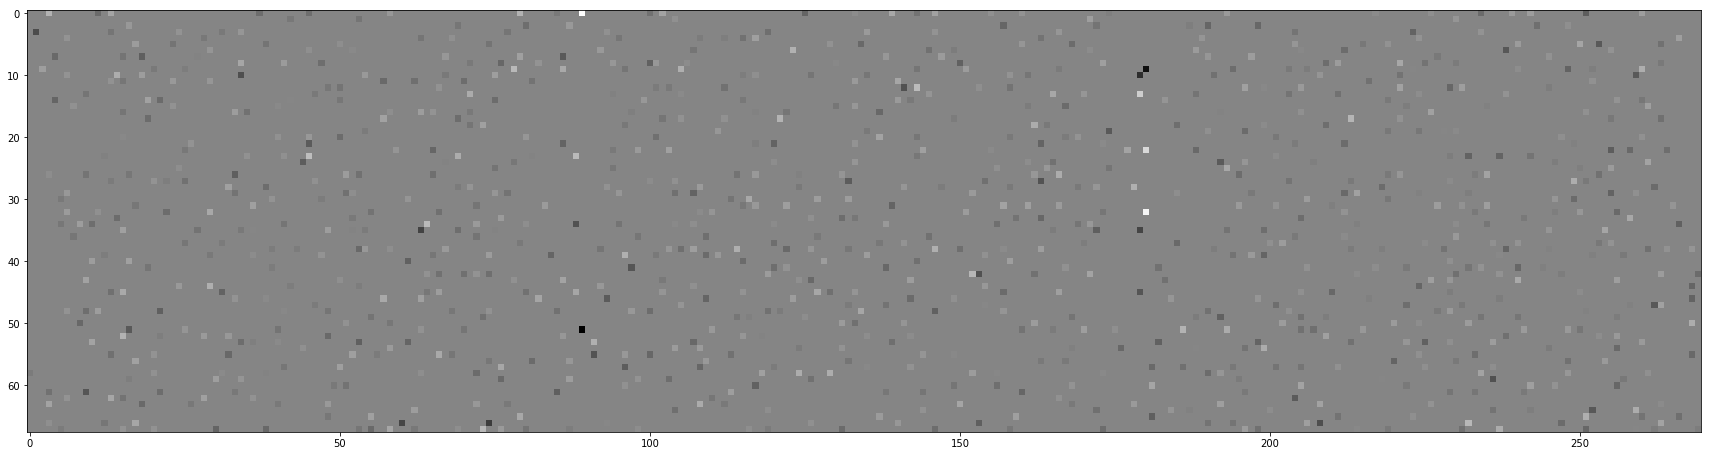

In [28]:
print(coef)
r=coef.reshape(68,270)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30, 30]
plt.imshow(r,cmap='gray')

(68, 270, 2800)
[[[129 127 125 ... 148 146 135]
  [127 121 119 ... 152 147 136]
  [126 118 116 ... 157 151 139]
  ...
  [130 136 145 ... 116 131 130]
  [129 133 138 ... 111 125 126]
  [129 129 130 ... 113 121 123]]

 [[132 133 133 ... 160 149 136]
  [133 135 136 ... 160 149 136]
  [133 137 138 ... 161 149 136]
  ...
  [131 128 124 ... 128 129 130]
  [132 130 128 ... 128 129 130]
  [132 132 131 ... 126 128 130]]

 [[132 165 187 ... 129 127 125]
  [125 167 189 ... 137 132 126]
  [120 141 196 ... 139 134 127]
  ...
  [112  94  81 ... 144 137 127]
  [111  91  77 ... 135 131 125]
  [111  91  77 ... 126 125 125]]

 ...

 [[129 132 135 ... 151 136 129]
  [131 139 146 ... 163 139 133]
  [132 143 154 ... 176 164 142]
  ...
  [130 134 129 ... 122 113 123]
  [130 138 142 ... 109 116 124]
  [129 129 130 ... 107 124 116]]

 [[127 116 102 ... 130 133 131]
  [127 119 107 ... 130 132 131]
  [128 119 108 ... 129 131 130]
  ...
  [130 132 130 ... 108 119 127]
  [131 132 130 ... 105 118 127]
  [131 133 1

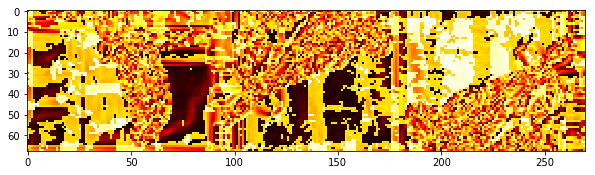

In [35]:
from scipy import ndimage
import matplotlib.pyplot as plt
images_=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/images_natimg2800_all.mat')['imgs']
print(images_.shape)
print(images)
images_=images_.transpose((2,0,1))
sx = ndimage.sobel(images_[0,:,:], axis=0, mode='constant')
sy = ndimage.sobel(images_[0,:,:], axis=1, mode='constant')
sob = np.array(np.hypot(sx, sy)).astype('float')
print(sob.shape)
matplotlib.rcParams['figure.figsize'] = [10, 10]
print(sob)
plt.imshow(sob,cmap='hot',interpolation='nearest')

(2800, 68, 270)
torch.Size([18360, 1])


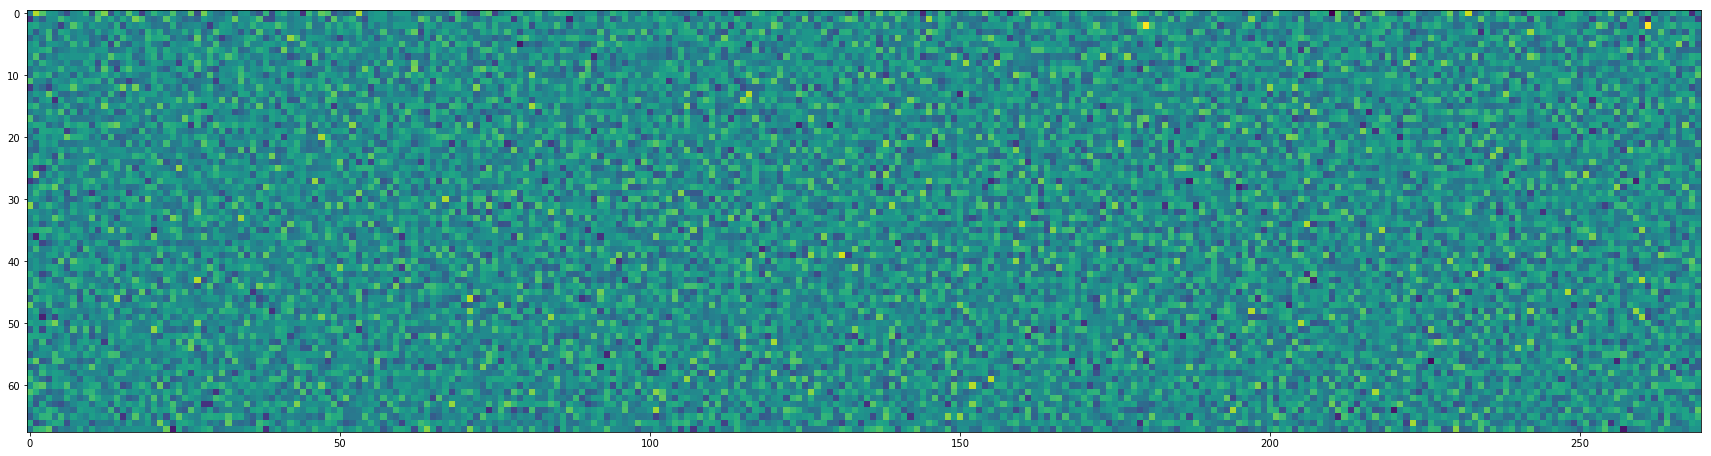

In [41]:
images_=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/images_natimg2800_all.mat')['imgs']
images_=images_.transpose((2,0,1))
def filter_images(images):
    im_lst=[]
    for im in range(0,images.shape[0]):
        sx = ndimage.sobel(images_[im,:,:], axis=0, mode='constant')
        sy = ndimage.sobel(images_[im,:,:], axis=1, mode='constant')
        sob = np.array(np.hypot(sx, sy)).astype('float')
        im_lst.append(sob)
    return np.array(im_lst)

filt=filter_images(images_)
print(filt.shape)
filt=filt.reshape((2800,68*270))
receptive_field=STA(images,x_train[:,1].T)
r=np.array(receptive_field.cpu()).reshape(68,270)


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30, 30]
plt.imshow(r)